In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Read Data

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("ratings_Electronics.csv", names=["userId", "productId", "rating", "timestamp"])  
df.head() 

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [9]:
# Display dataset information and basic statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB
None
             rating     timestamp
count  7.824482e+06  7.824482e+06
mean   4.012337e+00  1.338178e+09
std    1.380910e+00  6.900426e+07
min    1.000000e+00  9.127296e+08
25%    3.000000e+00  1.315354e+09
50%    5.000000e+00  1.361059e+09
75%    5.000000e+00  1.386115e+09
max    5.000000e+00  1.406074e+09


# Data Preprocess

In [10]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicate rows
print("Duplicate rows:\n", df.duplicated().sum())

Missing values:
 userId       0
productId    0
rating       0
timestamp    0
dtype: int64
Duplicate rows:
 0


In [11]:
# Drop duplicate rows, if any
df = df.drop_duplicates()

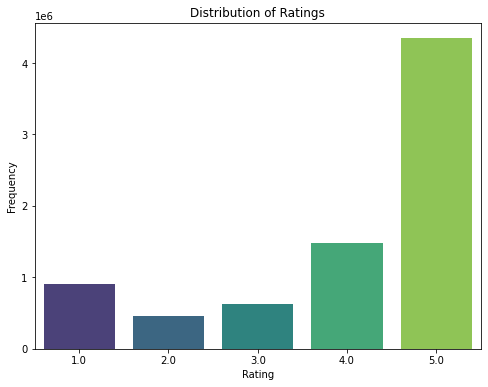

In [12]:
# Explore the distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='rating', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Data Filter

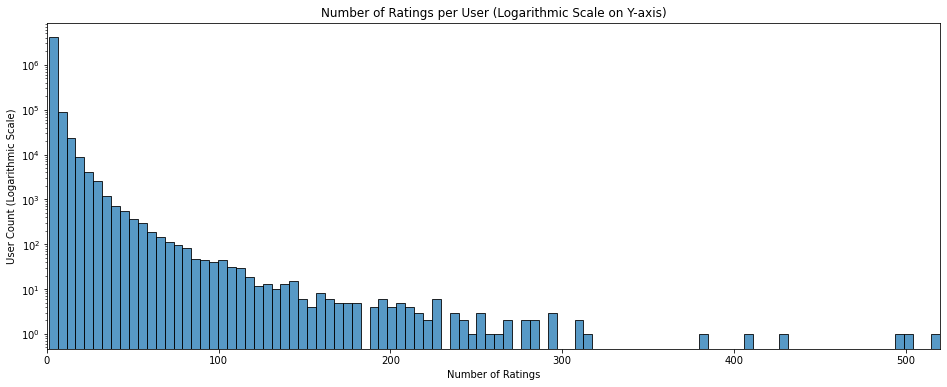

In [13]:
# Explore the number of ratings per user
user_ratings_count = df['userId'].value_counts()
plt.figure(figsize=(16, 6))
sns.histplot(user_ratings_count, kde=False, bins=100, log_scale=(False, True))
plt.title('Number of Ratings per User (Logarithmic Scale on Y-axis)')
plt.xlabel('Number of Ratings')
plt.ylabel('User Count (Logarithmic Scale)')
plt.xlim(0, user_ratings_count.max())  # Set the x-axis range from 0 to the maximum number of ratings per user
plt.show()

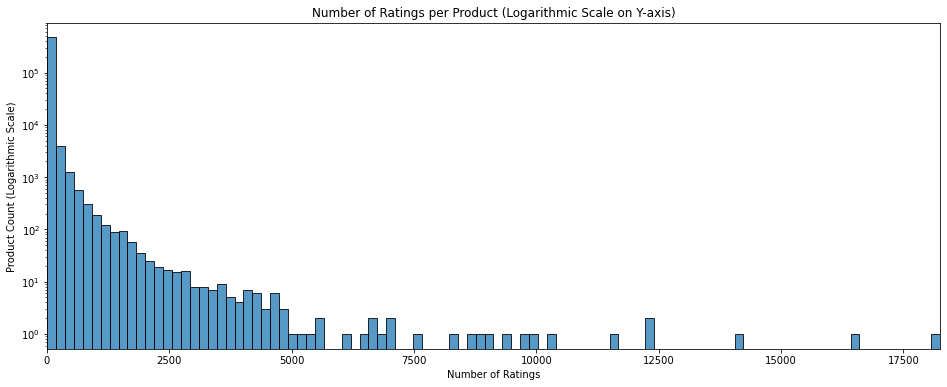

In [14]:
# Explore the number of ratings per product
product_ratings_count = df['productId'].value_counts()
plt.figure(figsize=(16, 6))
sns.histplot(product_ratings_count, kde=False, bins=100, log_scale=(False, True))
plt.title('Number of Ratings per Product (Logarithmic Scale on Y-axis)')
plt.xlabel('Number of Ratings')
plt.ylabel('Product Count (Logarithmic Scale)')
plt.xlim(0, product_ratings_count.max())  # Set the x-axis range from 0 to the maximum number of ratings per product
plt.show()

In [15]:
# Filter users and products with a minimum number of ratings
min_user_ratings = 5
min_product_ratings = 10

filtered_users = user_ratings_count[user_ratings_count >= min_user_ratings].index
filtered_products = product_ratings_count[product_ratings_count >= min_product_ratings].index

filtered_data = df[(df['userId'].isin(filtered_users)) & (df['productId'].isin(filtered_products))]

# Print the shape of the original and filtered data
print(f"Original data shape: {df.shape}")
print(f"Filtered data shape: {filtered_data.shape}")

Original data shape: (7824482, 4)
Filtered data shape: (1991560, 4)


# EDA

In [16]:
print("Data shape:", filtered_data.shape)
print("\nData types:\n", filtered_data.dtypes)
print("\nMissing values:\n", filtered_data.isnull().sum())

Data shape: (1991560, 4)

Data types:
 userId        object
productId     object
rating       float64
timestamp      int64
dtype: object

Missing values:
 userId       0
productId    0
rating       0
timestamp    0
dtype: int64


In [17]:
# For numerical features
print("\nSummary statistics for numerical features:\n", filtered_data.describe())

# For categorical features
print("\nFrequency distribution for categorical features:")
for col in filtered_data.select_dtypes(include=['object']):
    print(f"\n{col}:\n{filtered_data[col].value_counts()}")


Summary statistics for numerical features:
              rating     timestamp
count  1.991560e+06  1.991560e+06
mean   4.201605e+00  1.339592e+09
std    1.205818e+00  6.520485e+07
min    1.000000e+00  9.292320e+08
25%    4.000000e+00  1.316909e+09
50%    5.000000e+00  1.360714e+09
75%    5.000000e+00  1.385078e+09
max    5.000000e+00  1.406074e+09

Frequency distribution for categorical features:

userId:
ADLVFFE4VBT8      439
A3OXHLG6DIBRW8    423
A5JLAU2ARJ0BO     410
A6FIAB28IS79      390
A680RUE1FDO8B     356
                 ... 
A3EXR9VUQ5BPL1      1
AF29M8Y39NFJA       1
A3H2QCJ2H4X7O9      1
A192NSQ0XZX3Z7      1
AARVQS2FQQVVB       1
Name: userId, Length: 253895, dtype: int64

productId:
B007WTAJTO    5483
B003ES5ZUU    4480
B00DR0PDNE    4283
B0019EHU8G    3836
B002WE6D44    3107
              ... 
B000ODYL58       1
B00B7TNWU8       1
B000ODYT96       1
B000OF0IBW       1
B005HB8H7A       1
Name: productId, Length: 95177, dtype: int64


In [18]:
unique_users = filtered_data['userId'].nunique()
unique_products = filtered_data['productId'].nunique()
print(f"Number of unique users: {unique_users}")
print(f"Number of unique products: {unique_products}")

Number of unique users: 253895
Number of unique products: 95177


In [19]:
# Product rating mean and count
product_rating_agg = filtered_data.groupby('productId')['rating'].agg(['mean', 'count']).reset_index()

# User rating mean and count
user_rating_agg = filtered_data.groupby('userId')['rating'].agg(['mean', 'count']).reset_index()


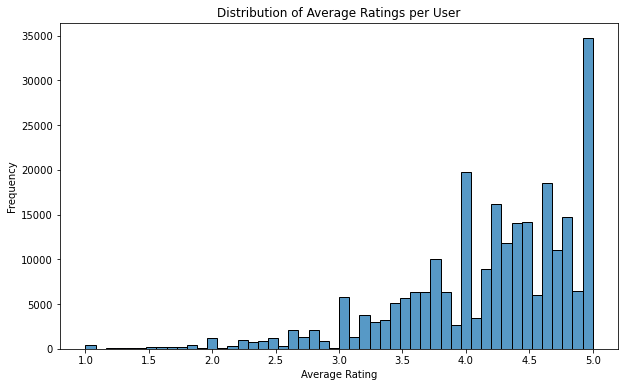

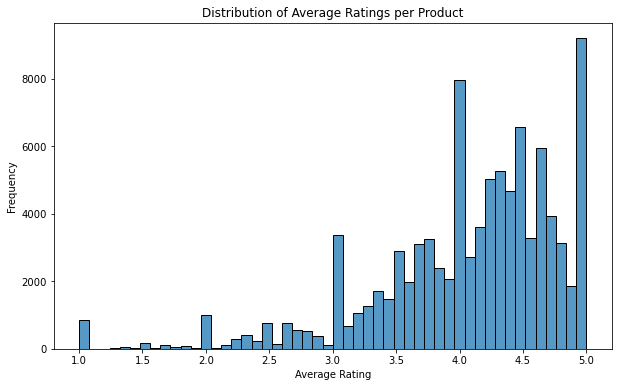

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(user_rating_agg['mean'], bins=50, kde=False)
plt.title('Distribution of Average Ratings per User')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(product_rating_agg['mean'], bins=50, kde=False)
plt.title('Distribution of Average Ratings per Product')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

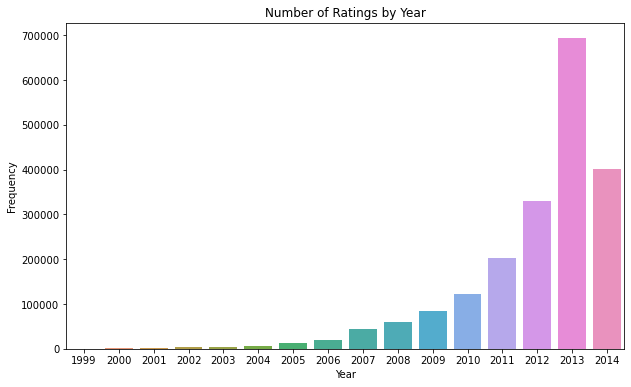

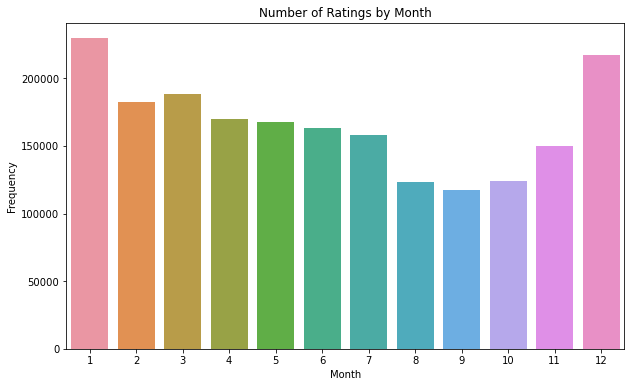

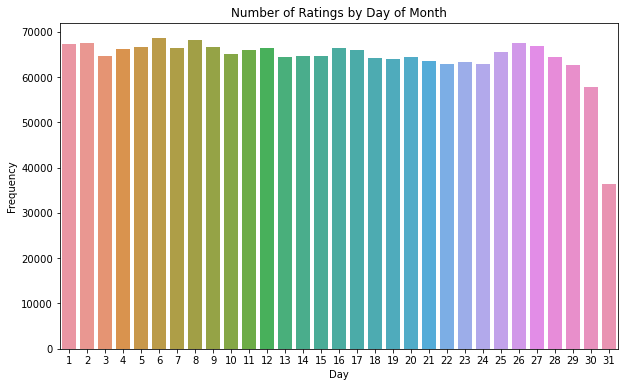

In [21]:
from datetime import datetime
data_with_datetime = filtered_data.copy()

# Convert the 'timestamp' column to a datetime object
data_with_datetime['datetime'] = data_with_datetime['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

# Extract year, month, day, and hour information
data_with_datetime['year'] = data_with_datetime['datetime'].dt.year
data_with_datetime['month'] = data_with_datetime['datetime'].dt.month
data_with_datetime['day'] = data_with_datetime['datetime'].dt.day



# Visualize the distribution of ratings by year, month, day, and hour
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=data_with_datetime)
plt.title('Number of Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=data_with_datetime)
plt.title('Number of Ratings by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='day', data=data_with_datetime)
plt.title('Number of Ratings by Day of Month')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()

# TA Feedback

Doable strategy in approaching the project. A small detail is that you need to have a clear statement about your objective of the project. I do see the intuition here so I didn't take points off, but please do so next time.

Deep learning is a good approach but you may want to start with KNN and SVD first, and if you have more time, you can give DL models a try. Also, note that you need to differentiate your project implementation with the ones already in Kaggle. Innovation is required. See rubric for Part 1 for acceptable innovation.

Another thing to consider before you actually build your model is filtering the input data. You may want to ignore some users who don't meet certain criteria to better generate the result.

# Milestone2 Template

Classifying Animal Images Using Vision Transformers
Team: Name 1, Name 2, Name 3. Project Mentor TA: TA Name
1) Introduction
Set up the problem: In 1-2 paragraphs, describe the dataset you are/will be training and testing on, as well as what are the inputs and outputs of your eventual machine learning model.

Implementation: In one paragraph, summarize your implementation contributions.

Evaluation: In one paragraph, summarize your evaluation contributions.

Throughout the report, use mathematical notation to explain clearly as appropriate. You may find add-ons like “Auto-LaTeX Equations” (https://workspace.google.com/marketplace/app/autolatex_equations/850293439076) useful, and you are of course welcome to use Google Docs’ native equation mode. 
2) How We Have Addressed Feedback From the Proposal Evaluations
Describe clearly the key feedback you received from the proposal and any other interactions with your project mentor etc., and how you have incorporated it into your project plans. 1-2 paragraphs. 
3) Prior Work We are Closely Building From
2-3 sentence introduction if necessary to set up the context for what follows. You may be able to reuse material from your proposal for this section.
Paper / blog post/ Kaggle submission etc.: Title. URL. What it does that is relevant to this project (2-3 sentences). Code link. Provide any links in text, like www.google.com, not like Google.
More if needed. There should be at most 2 such closely related prior works in most cases.
4) Contributions
Describe in detail your implementation and evaluation contributions, including:

Details regarding the proposed contributions
Progress towards completing the contributions
Any difficulties encountered so far

At this point, you should have a fairly complete plan for carrying out the project, and have made significant progress towards submission. Please report preliminary results in Section 4.2. At the very least, you should have written code to read in the dataset, set up the evaluation metrics, and train/evaluate a few baselines (both simple things like constant predictions, as well as things basic machine learning algorithms such as linear/logistic regression). You should also explore at least one dataset shift, and evaluate its impact on your baselines.
4.1 Implementation Contributions
Describe your proposed implementation contributions:

Option 1: If you are implementing and systematically comparing a wide variety of different approaches, describe them. Describe features you plan to implement, neural network architectures you plan to consider, hyperparameters you plan to vary, etc.
Option 2: If you are implementing a substantial approach for the target dataset, write out some high-level pseudocode, and discuss how your algorithm extends the prior work you have cited in Sec 2, and talk about how much progress you have made towards actually implementing and testing it, and any early results.

Be scholarly, and generously cite prior work, even aside from those in Section 3, if needed. Format them as [Author 1, 2020] or as [A]. 
4.2 Evaluation Contribution
What are the key questions your experiments will try to answer, or hypotheses your experiments will try to validate? What will be the baselines for your approach? What datasets and performance metrics? What are the dataset shifts you plan to consider?
5)  Risk Mitigation Plan
Examples of questions to consider here: How will you build a minimum viable project within the remaining time? Will you start with a simplified setting where you can get some early results, so that you still have time to pivot if needed? If your approach doesn’t work, how will you still turn in a useful project report? What if you find that you need too much compute? Will you try your algorithm on different, simpler data, such as a “toy” synthetic dataset you generated? Will you evaluate the reasons for failure, or find specific examples where your approach works better, even if it does not do better on the full dataset? We are looking here for evidence that you understand the risks associated with your plans, and have thought through these possibilities.


# ChatGPT auto generate report

Building a Recommender System for Product Recommendations
Team: Name 1, Name 2, Name 3. Project Mentor TA: TA Name

Introduction
In this project, our objective is to develop a recommender system that suggests products to users based on their preferences and historical data. We are working on a dataset containing user-item interactions with information about users, products, and their ratings. The dataset consists of approximately 1,991,560 records, with each record containing a user ID, product ID, rating (1 to 5), and a timestamp.
Implementation: We started by reading and filtering the data to remove any potential noise and focused on users who meet certain criteria, such as having a minimum number of ratings. We then performed exploratory data analysis (EDA) to gain insights into the data and identify any trends or patterns. Based on these insights and TA feedback, we chose to first implement and evaluate collaborative filtering methods (User-User and Item-Item) using the surprise library, and later explore deep learning approaches if time permits.

Evaluation: We have evaluated the performance of both User-User and Item-Item collaborative filtering models using 5-fold cross-validation and calculated their Root Mean Square Error (RMSE). We will compare the performance of these models to decide which one to use for our recommender system.

How We Have Addressed Feedback From the Proposal Evaluations
We received valuable feedback from our project mentor and proposal evaluations, which we have incorporated into our project plans. The key feedback included having a clear statement of the project objective, starting with simpler models like KNN and SVD before exploring deep learning approaches, and filtering the input data to better generate results. We have addressed these concerns in our revised plan and have focused on implementing and evaluating User-User and Item-Item collaborative filtering models using the surprise library.

Prior Work We are Closely Building From
We closely followed the tutorial by Nicolas Hug, "A basic collaborative filtering algorithm with the Surprise library." The tutorial provides an introduction to building collaborative filtering-based recommender systems using the surprise library. Tutorial: https://surprise.readthedocs.io/en/stable/getting_started.html

Contributions
4.1 Implementation Contributions
We implemented User-User and Item-Item collaborative filtering models using the surprise library, specifically the KNNWithMeans algorithm. We compared their performance using 5-fold cross-validation and calculated their RMSE. We also plan to explore more sophisticated models like SVD and deep learning approaches if time permits, ensuring that our implementation is innovative and distinct from existing Kaggle solutions.

4.2 Evaluation Contribution
Our experiments aim to compare the performance of User-User and Item-Item collaborative filtering methods to decide which approach is more suitable for our dataset. We used 5-fold cross-validation and calculated the RMSE to evaluate the performance of both models. We also explored the impact of different time-based features on the rating distribution.

Risk Mitigation Plan
To ensure a minimum viable project within the remaining time, we have started by implementing and evaluating two well-established recommender system methods, User-User and Item-Item collaborative filtering. In case we face any difficulties or limitations with our chosen approach, we can consider alternative methods, such as matrix factorization or content-based filtering, to improve the performance of our recommender system. If computational resources become a concern, we can explore techniques to reduce the dataset size or work with a smaller sample. We can also evaluate the reasons for failure and identify specific cases where our approach performs better, even if it does not outperform on the entire